In [1]:
print("loaded data set from mnist_1 method")
print("introduce regulisation")
# https://machinelearningmastery.com/how-to-reduce-overfitting-in-deep-learning-with-weight-regularization/


loaded data set from mnist_1 method
introduce regulisation


In [2]:
from load_mnist_1 import *


In [3]:
train_images, train_labels = load_images_train()
train_labels_str = image_class_to_str(train_labels)

test_images, test_labels = load_images_test()
test_lables_str = image_class_to_str(test_labels)


In [4]:

# https://betweenandbetwixt.com/2019/01/04/convolutional-neural-network-with-keras-mnist/
from keras.layers import Dense,GlobalAveragePooling2D
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam, SGD, Adadelta


from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
from keras.layers import Dense, Conv2D, Activation, Flatten, MaxPool2D, BatchNormalization
from keras.models import Sequential

from keras.utils import to_categorical


/data/anaconda/envs/py35/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
from keras.regularizers import l2

In [6]:

# keras.applications.resnet.ResNet50(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)

model = Sequential()
model.add(
    Conv2D(
        filters=8, 
        kernel_size=3, 
        padding="same", 
        input_shape=(28,28,1), 
        data_format="channels_last"))

model.add(Activation("relu"))

model.add(Conv2D(filters=16, kernel_size=3, padding="same", activation="relu"))

model.add(Conv2D(filters=16, kernel_size=3, padding="same", activation="relu", kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))

model.add(MaxPool2D(pool_size=2, strides=2))

model.add(Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))
model.add(Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(MaxPool2D(pool_size=2, strides=2))

model.add(Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

model.add(Flatten()) # Stretching out for our FC layer
model.add(Dense(128))
model.add(Activation("relu"))
model.add(Dense(128, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Activation("relu"))
model.add(Dense(128, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Activation("relu"))
		
model.add(Dense(10,activation='softmax'))




# print the cnn arch
model.summary()

model.compile(loss="categorical_crossentropy",
            optimizer=Adadelta(),
            metrics=["accuracy"])
# Test accuracy: 0.9157 5 epoch
# Test accuracy: 0.918 10 epoch


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 8)         80        
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 16)        1168      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
conv

In [7]:
# reshape inputs 
no_images_train = len(train_images)
no_images_test = len(test_images)


train_images_reshape = train_images.reshape(no_images_train, 28,28,1)
test_images_reshape = test_images.reshape(no_images_test, 28,28,1)



train_labels_cat = to_categorical(train_labels, num_classes=10)
test_labels_cat = to_categorical(test_labels, num_classes=10)
print(train_labels[10])
print(train_labels_cat[10])

print(train_labels[5])
print(train_labels_cat[5])

train_images_reshape = train_images_reshape / 255
test_images_reshape = test_images_reshape / 255

0
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [8]:
history = model.fit(
    train_images_reshape, 
    train_labels_cat, 
    epochs=20,
    batch_size=128,
    validation_data=(test_images_reshape, test_labels_cat))


Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 47s 789us/step - loss: 1.3261 - acc: 0.7293 - val_loss: 0.6790 - val_acc: 0.8172
Epoch 2/20
60000/60000 [==============================] - 8s 138us/step - loss: 0.5162 - acc: 0.8523 - val_loss: 0.4781 - val_acc: 0.8587
Epoch 3/20
60000/60000 [==============================] - 8s 138us/step - loss: 0.4184 - acc: 0.8737 - val_loss: 0.4151 - val_acc: 0.8718
Epoch 4/20
60000/60000 [==============================] - 8s 137us/step - loss: 0.3748 - acc: 0.8847 - val_loss: 0.3780 - val_acc: 0.8825
Epoch 5/20
60000/60000 [==============================] - 8s 136us/step - loss: 0.3429 - acc: 0.8945 - val_loss: 0.3822 - val_acc: 0.8821
Epoch 6/20
60000/60000 [==============================] - 8s 137us/step - loss: 0.3210 - acc: 0.9002 - val_loss: 0.3392 - val_acc: 0.8962
Epoch 7/20
60000/60000 [==============================] - 8s 137us/step -

In [9]:
# We can get our score
score = model.evaluate(test_images_reshape, test_labels_cat, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.3370110794425011
Test accuracy: 0.9025


dict_keys(['loss', 'val_acc', 'val_loss', 'acc'])


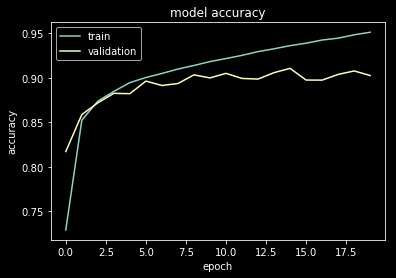

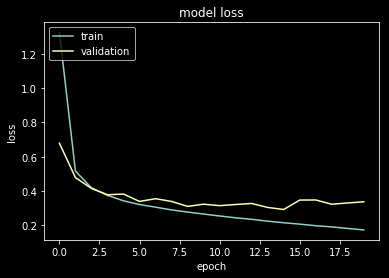

In [10]:
# https://stackoverflow.com/questions/41908379/keras-plot-training-validation-and-test-set-accuracy
# https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
